In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)

In [7]:
from sklearn.model_selection import cross_validate 

cv_results_tree = cross_validate(tree, data, target, cv=10, 
        return_estimator=True, return_train_score=True)

cv_results_forest = cross_validate(forest, data, target, cv=10, 
        return_estimator=True, return_train_score=True)

[cv_results_forest['test_score'] > cv_results_tree['test_score']]

array([0.59650558, 0.66957713, 0.7193112 , 0.8184209 , 0.6242818 ,
       0.72483157, 0.53090702, 0.51655398, 0.58421785, 0.49038086])

In [11]:
forest_5 = RandomForestRegressor(random_state=0, n_estimators=5)
forest_100 = RandomForestRegressor(random_state=0, n_estimators=100)

cv_results_forest_5 = cross_validate(forest_5, data, target, cv=10, 
        return_estimator=True, return_train_score=True)

cv_results_forest_100 = cross_validate(forest_100, data, target, cv=10, 
        return_estimator=True, return_train_score=True)

[cv_results_forest_100['test_score'] > cv_results_forest_5['test_score']]


[array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True])]

In [26]:
from sklearn.model_selection import validation_curve

n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]


train_scores, test_scores = validation_curve(
    forest,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    n_jobs=2,
)

In [27]:
import numpy as np

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


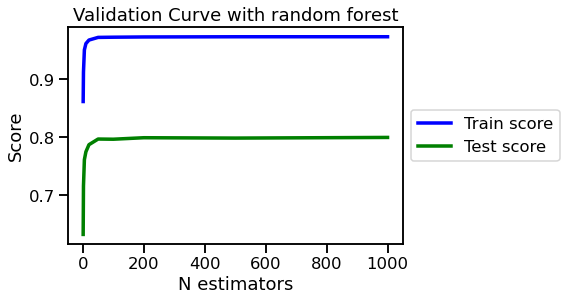

In [61]:
import matplotlib.pyplot as plt

plt.title("Validation Curve with random forest")
plt.xlabel(r"N estimators")
plt.ylabel("Score")

# plt.xlim(1, 20)

plt.plot(
    n_estimators, train_scores_mean, label="Train score",
    color="blue")

plt.plot(
    n_estimators, test_scores_mean, label="Test score",
    color="green")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [29]:
shallow_forest = RandomForestRegressor(random_state=0, max_depth=5)

n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

train_scores_shallow, test_scores_shallow = validation_curve(
    shallow_forest,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    n_jobs=2,
)

In [30]:
train_scores_shallow_mean = np.mean(train_scores_shallow, axis=1)
test_scores_shallow_mean = np.mean(test_scores_shallow, axis=1)

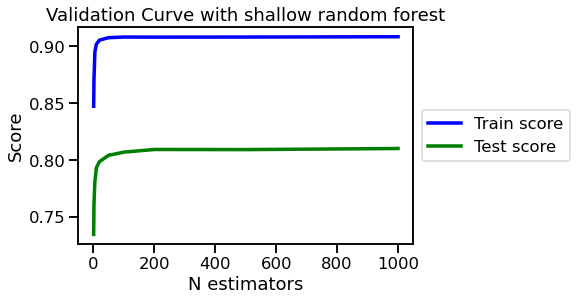

In [31]:
import matplotlib.pyplot as plt

plt.title("Validation Curve with shallow random forest")
plt.xlabel(r"N estimators")
plt.ylabel("Score")


plt.plot(
    n_estimators, train_scores_shallow_mean, label="Train score",
    color="blue")

plt.plot(
    n_estimators, test_scores_shallow_mean, label="Test score",
    color="green")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [39]:
train_diff = [train_scores_mean - train_scores_shallow_mean]
test_diff = [test_scores_mean - test_scores_shallow_mean]

Text(0.5, 1.0, 'Difference between full and limited depth - training data')

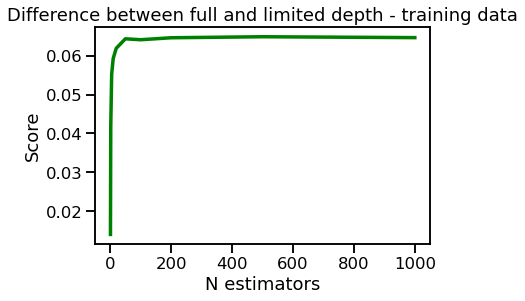

In [43]:
plt.plot(
    n_estimators, train_diff[0], color="green")

plt.xlabel(r"N estimators")
plt.ylabel("Score")
plt.title("Difference between full and limited depth - training data")

Text(0.5, 1.0, 'Difference between full and limited depth - testing data')

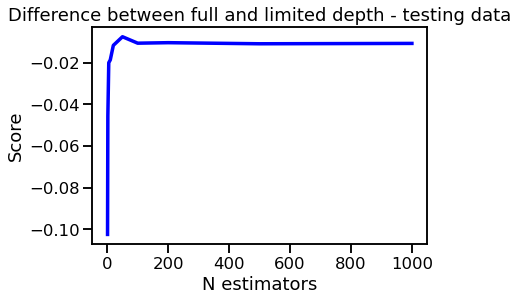

In [44]:
plt.plot(
    n_estimators, test_diff[0], color="blue")

plt.xlabel(r"N estimators")
plt.ylabel("Score")
plt.title("Difference between full and limited depth - testing data")

In [45]:
train_test_gap_full = [test_scores_mean - train_scores_mean]
train_test_gap_shallow = [train_scores_shallow_mean - test_scores_shallow_mean]

Text(0.5, 1.0, 'Gap between train and test scores - full forest')

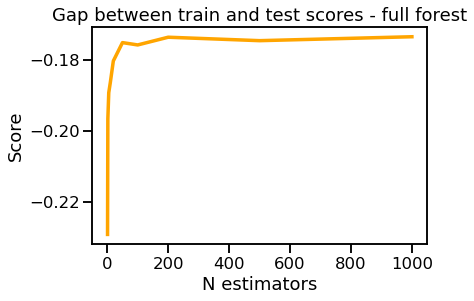

In [47]:
plt.plot(
    n_estimators, train_test_gap_full[0], color="orange")

plt.xlabel(r"N estimators")
plt.ylabel("Score")
plt.title("Gap between train and test scores - full forest")

Text(0.5, 1.0, 'Gap between train and test scores - shallow forest')

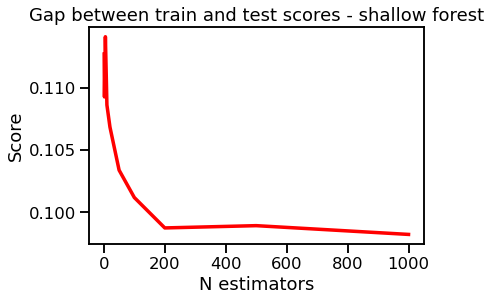

In [48]:
plt.plot(
    n_estimators, train_test_gap_shallow[0], color="red")

plt.xlabel(r"N estimators")
plt.ylabel("Score")
plt.title("Gap between train and test scores - shallow forest")

# Second part

In [49]:
rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([0.83120264, 0.83309064, 0.83195043, 0.84834224, 0.85790323,
       0.86235297, 0.84791111, 0.85183089, 0.82241954, 0.85045978])

In [50]:
tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
cv_results_tree["train_score"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [52]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor(random_state=0)

max_iter = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

train_scores_hgbr, test_scores_hgbr = validation_curve(
    hgbr,
    data,
    target,
    param_name="max_iter",
    param_range=max_iter,
    n_jobs=2,
)

In [53]:
train_scores_mean_hgbr = np.mean(train_scores_hgbr, axis=1)
test_scores_mean_hgbr = np.mean(test_scores_hgbr, axis=1)

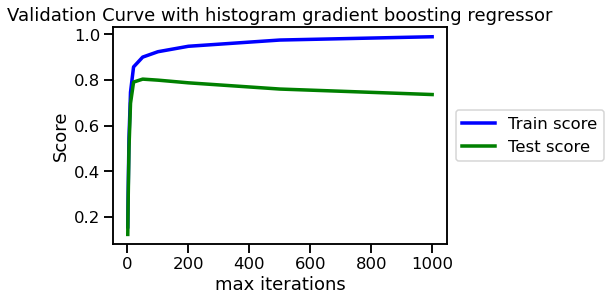

In [62]:
plt.title("Validation Curve with histogram gradient boosting regressor")
plt.xlabel(r"max iterations")
plt.ylabel("Score")

# plt.xlim(1, 20)

plt.plot(
    max_iter, train_scores_mean_hgbr, label="Train score",
    color="blue")

plt.plot(
    max_iter, test_scores_mean_hgbr, label="Test score",
    color="green")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()